In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [2]:
df=pd.read_csv("dataset_sdn.csv")
df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [4]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [5]:
column_names= df.columns
column_names

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

Text(0, 0.5, 'Count')

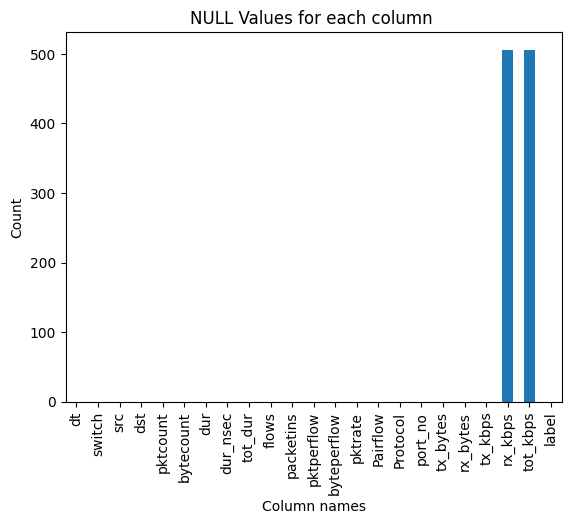

In [6]:
df.isnull().sum().plot.bar()
plt.title("NULL Values for each column ")
plt.xlabel("Column names")
plt.ylabel("Count")

In [7]:
df=df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-

In [9]:
y=df['label']
x=df.drop(['label'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=104,test_size=0.2)
train_data=pd.concat([x_train,y_train],axis=1,join='inner')

correl=train_data.corr(numeric_only=True)['label'].sort_values()
correl.drop('label',inplace=True)

In [10]:
selected=correl.loc[abs(correl)>0.08]
attr_selected=list(selected.index)
print(attr_selected)


['flows', 'dt', 'tot_dur', 'dur', 'pktperflow', 'pktrate', 'bytecount', 'pktcount']


In [11]:
norm_x_train_data=(x_train.select_dtypes(include=['float64','int64'])-x_train.min(numeric_only=True))
norm_x_test_data=(x_test.select_dtypes(include=['float64','int64'])-x_test.min(numeric_only=True))
norm_x_train_data=preprocessing.scale(norm_x_train_data[attr_selected])
norm_x_test_data=preprocessing.scale(norm_x_test_data[attr_selected])

norm_x_train_data.shape
y_train.shape

c:\Users\sriya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\sriya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


(83071,)

In [12]:
train_x,val_x,train_y,val_y=train_test_split(norm_x_train_data,y_train,stratify=y_train,test_size=0.2,random_state=0)

In [13]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(norm_x_train_data,y_train)
nb.score(norm_x_test_data,y_test)


0.6266852850539292

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(norm_x_train_data,y_train)
knn.score(norm_x_test_data,y_test)

0.992825500770416

In [30]:
from sklearn import svm
clf= svm.SVC(kernel='poly')
clf.fit(norm_x_train_data,y_train)
clf.score(norm_x_test_data,y_test)

0.9059129429892142

HYBRID MODEL TESTING


In [33]:
train_x,val_x,train_y,val_y=train_test_split(norm_x_train_data,y_train,stratify=y_train,test_size=0.2,random_state=0)

In [17]:
print(norm_x_train_data.shape,norm_x_test_data.shape)

(83071, 8) (20768, 8)


In [45]:
model1=svm.SVC()
model1.fit(train_x,train_y)

svm_val_pred=model1.predict(val_x)
svm_val_pred=pd.DataFrame(svm_val_pred)

svm_test_pred=model1.predict(norm_x_test_data)
svm_test_pred=pd.DataFrame(svm_val_pred)

In [19]:
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(train_x,train_y)
knn_val_pred=model1.predict(val_x)
knn_val_pred=pd.DataFrame(knn_val_pred)

knn_test_pred=model1.predict(norm_x_test_data)
knn_test_pred=pd.DataFrame(knn_val_pred)

In [41]:
model3=GaussianNB()
model3.fit(train_x,train_y)
nb_val_pred=model1.predict(val_x)
nb_val_pred=pd.DataFrame(nb_val_pred)

nb_test_pred=model1.predict(norm_x_test_data)
nb_test_pred=pd.DataFrame(nb_val_pred)

In [47]:
val_input=pd.concat([pd.DataFrame(val_x),nb_val_pred,knn_val_pred,svm_val_pred],axis=1)
test_input=pd.concat([pd.DataFrame(norm_x_test_data),nb_test_pred,knn_test_pred,svm_test_pred])


val_input.drop([0],axis=1)


,1,2,3,4,5,6,7,knn_pred
0,-0.938705,1.727939,1.725078,-0.844254,-0.845977,-0.779661,-0.996934,NaN
1,0.565765,-0.438598,-0.437050,0.268898,0.269320,0.413565,0.061577,NaN
2,-0.541177,-0.286870,-0.288911,0.379638,0.381652,0.822454,0.429023,NaN
3,-1.096362,-0.611498,-0.613406,0.457076,0.457877,-0.716524,-0.093908,NaN
4,1.114510,0.249472,0.247212,-0.844254,-0.845977,-0.780483,-1.004785,NaN
...,...,...,...,...,...,...,...,...
24917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# convert column names to strings
val_input.columns = val_input.columns.astype(str)
test_input.columns = test_input.columns.astype(str)

# create a SimpleImputer object to replace NaN values with mean values
imputer = SimpleImputer()

# impute NaN values in the input and test dataframes
rf_udp_input_imputed = pd.DataFrame(imputer.fit_transform(val_input))
rf_udp_test_imputed = pd.DataFrame(imputer.fit_transform(test_input))

# add two columns with default value 0 to the test dataset
rf_udp_test_imputed[19] = 0
rf_udp_test_imputed[20] = 0

# select a subset of rows from rf_udp_input_imputed that matches the number of samples in val_y_udp
rf_udp_input_imputed = rf_udp_input_imputed.iloc[:len(val_y)]

# define the random forest classifier and fit the training data
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(rf_udp_input_imputed, val_y)

# make predictions on the test data
rf_udp_pred_test = rf.predict(rf_udp_input_imputed.iloc[:len(val_y), :])
test_accuracy = accuracy_score(val_y, rf_udp_pred_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 1.0
